PROBLEM STATEMENT: 

    estimate "Life expectancy"

By: Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("archive (4).zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
ds = pd.read_csv("Life Expectancy Data.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
ds.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Checking country
ds['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [6]:
ds['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

### EDA

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

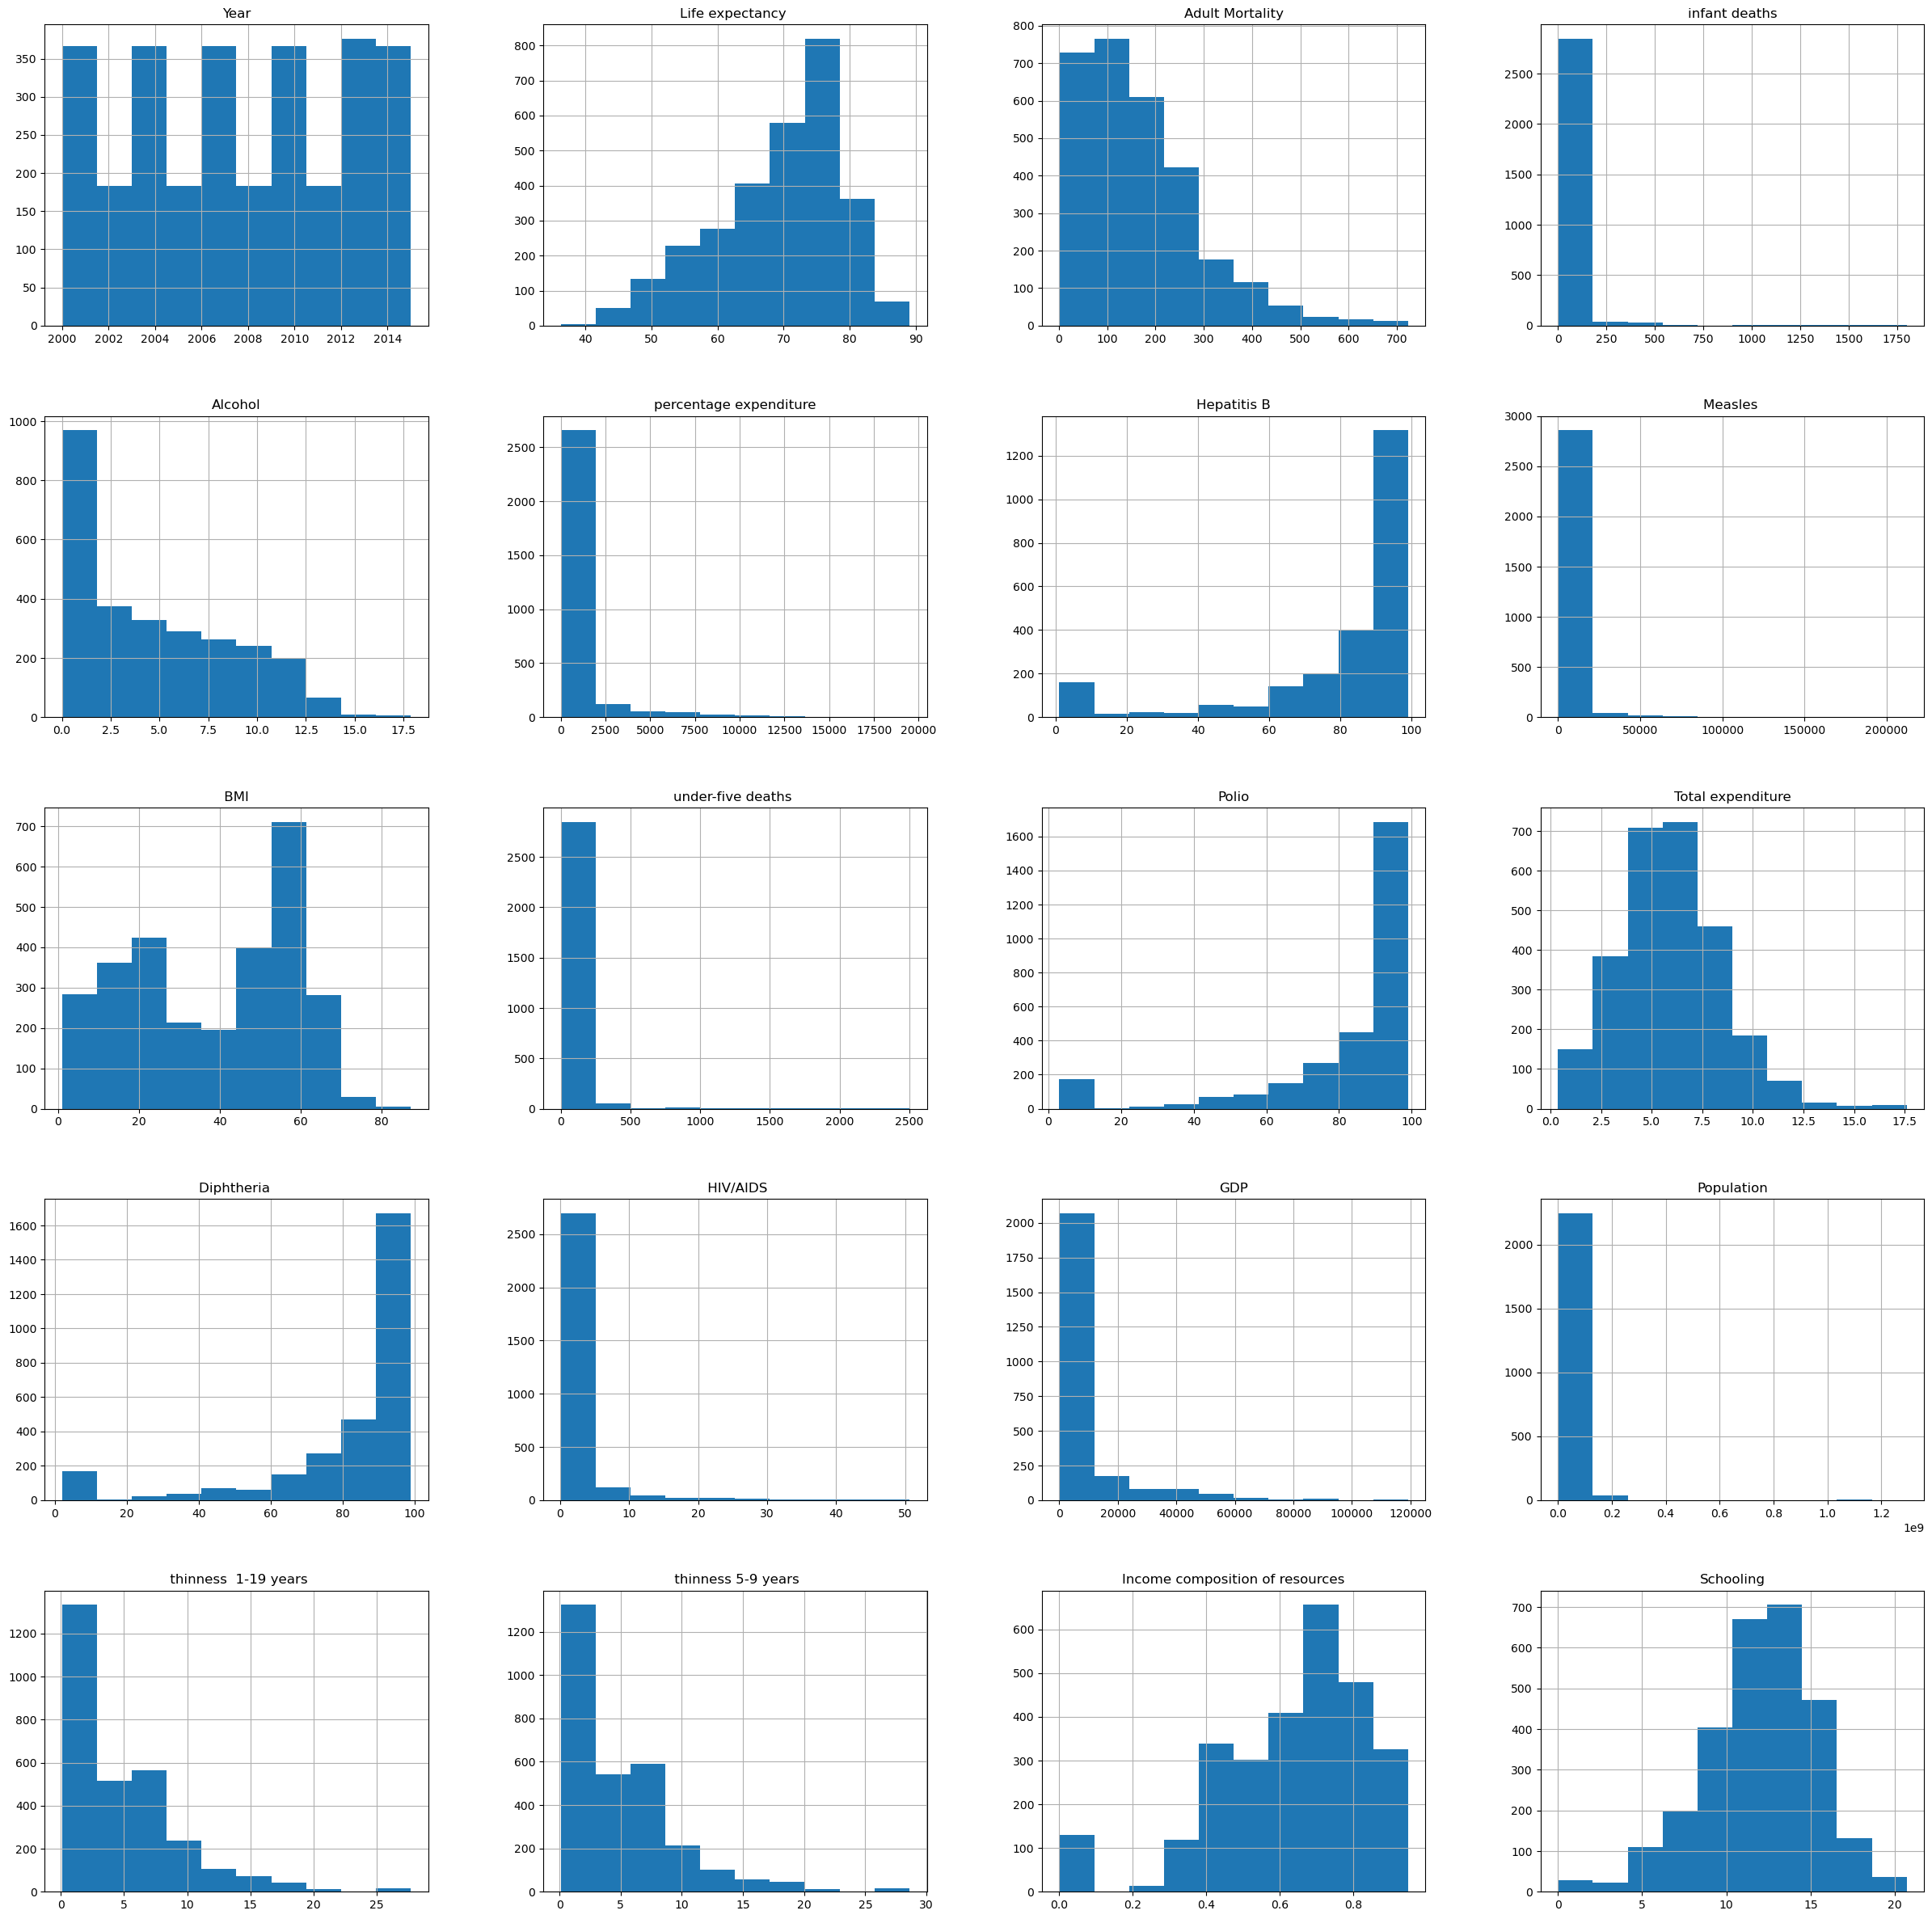

In [8]:
ds.hist(figsize = (30, 30))

C:\Users\hp\AppData\Local\Temp\ipykernel_19028\212564551.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(ds.corr(), annot = True)


<Axes: >

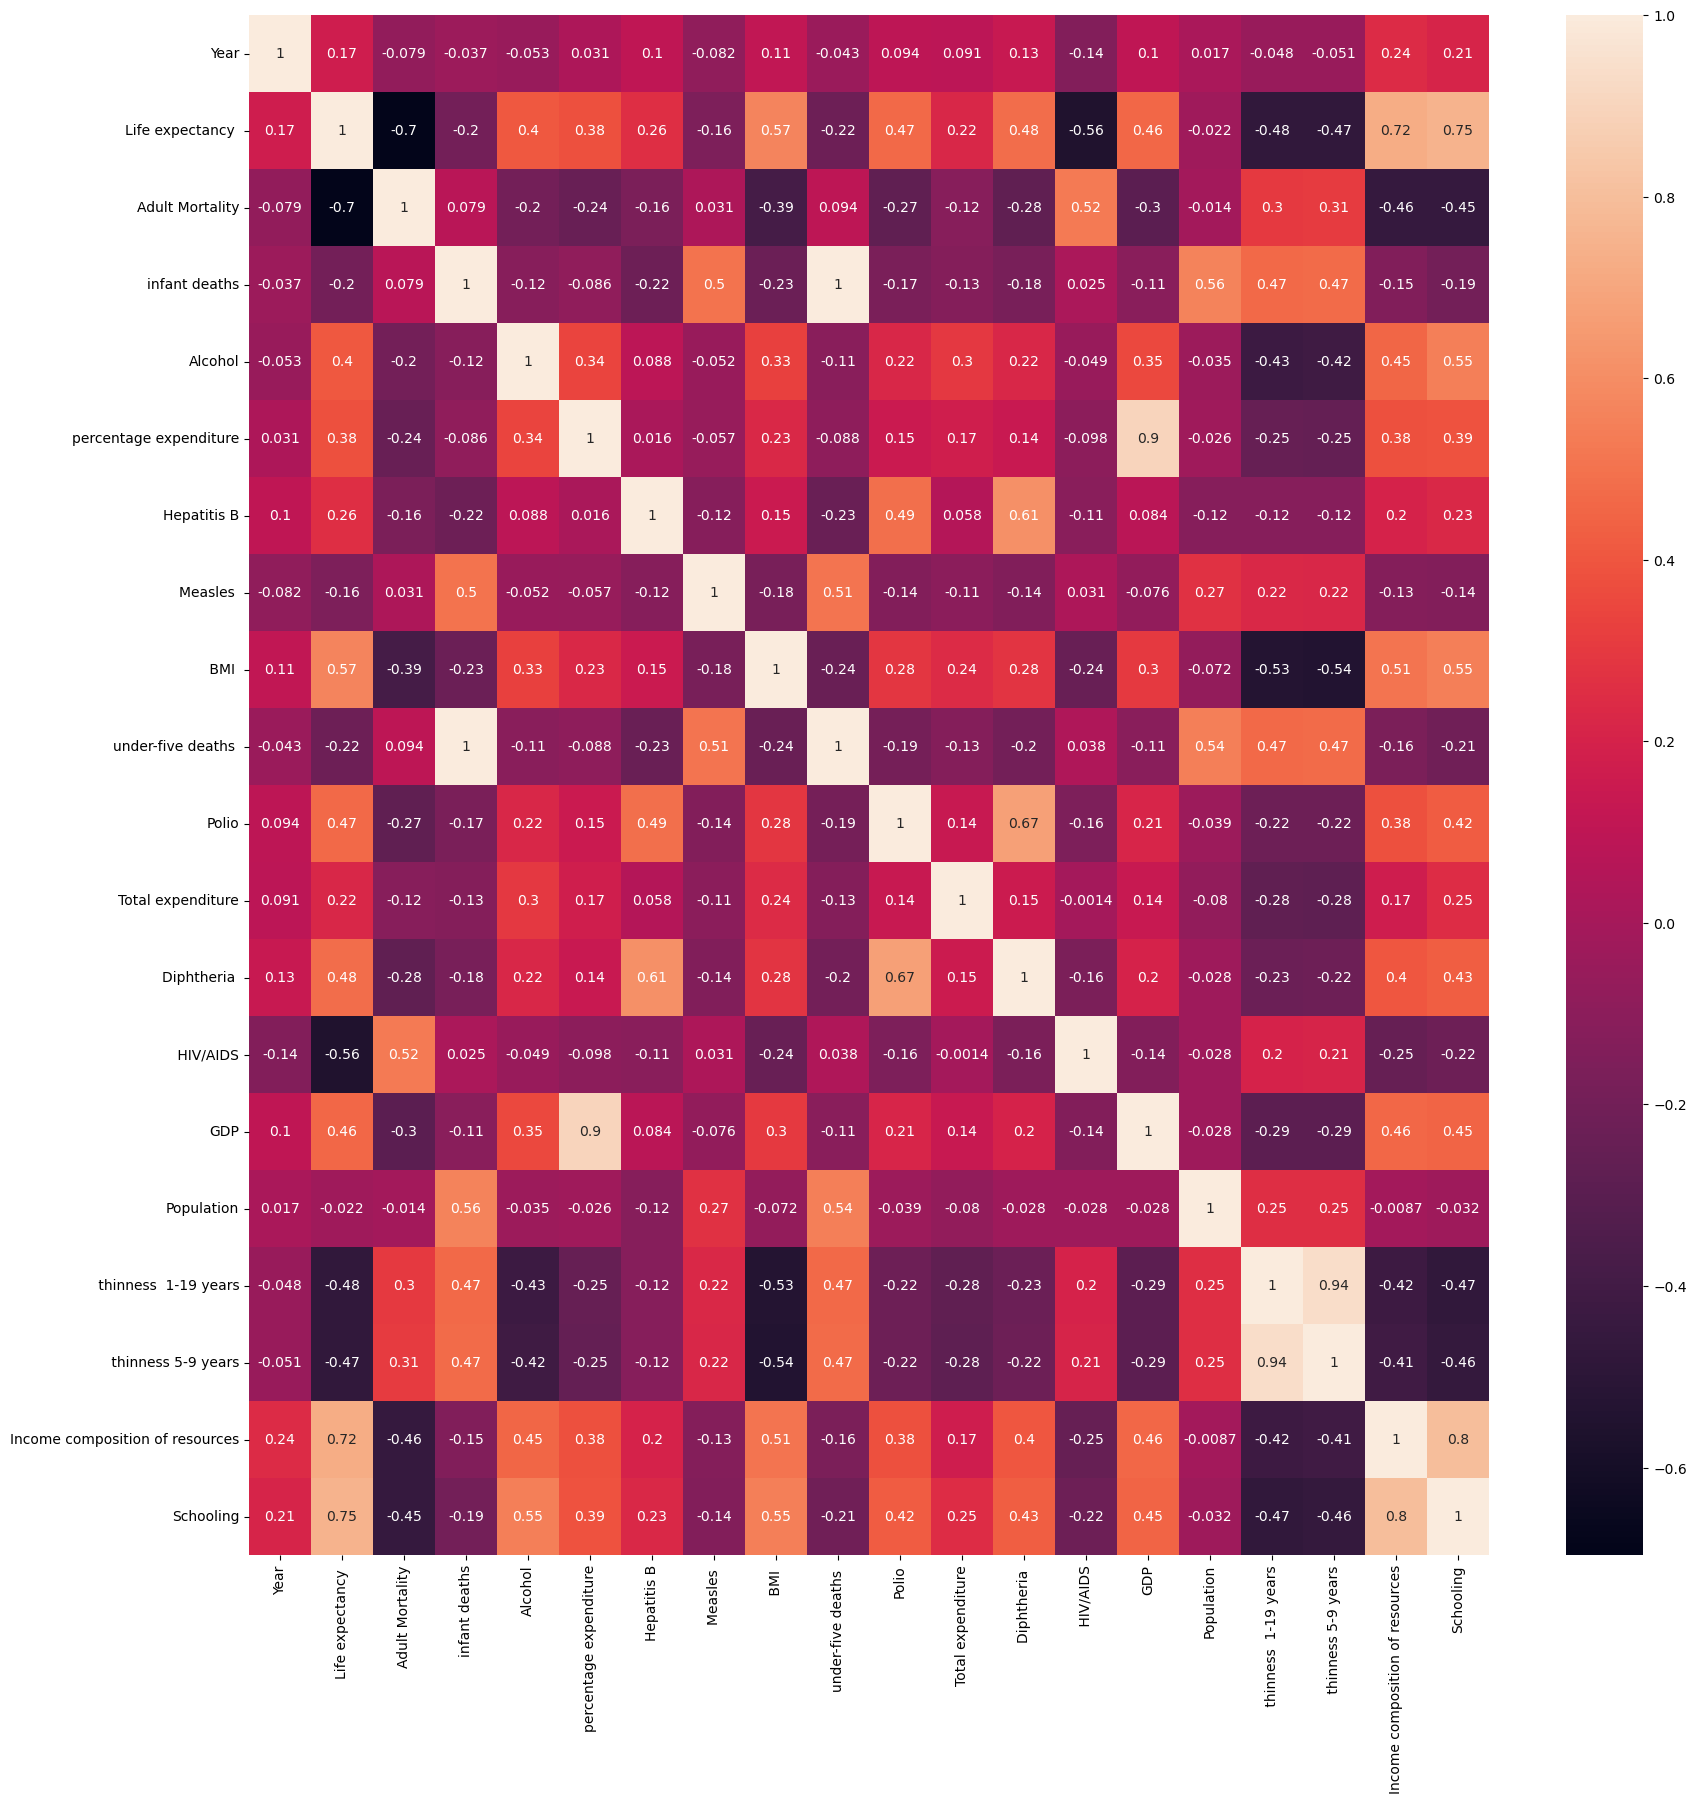

In [11]:
plt.figure(figsize = (20, 20))
sb.heatmap(ds.corr(), annot = True)

### Preprocessing 


In [12]:
ds = ds.drop('Country', axis = 1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [33]:
from sklearn.preprocessing import OneHotEncoder 
en = OneHotEncoder()
tr = en.fit_transform(ds[['Status']])
print(tr.toarray())
print(en.categories_)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[array(['Developed', 'Developing'], dtype=object)]


In [35]:
ds[en.categories_[0]] = tr.toarray()
print(ds.head())

   Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0     0.01               71.279624         65.0      1154   19.1  ...   
1     0.01               73.523582         62.0       492   18.6  ...   
2     0.01               73.219243         64.0       430   18.1  ...   
3     0.01               78.184215         67.0      2787   17.6  ...   
4     0.01                7.097109         68.0      3013   17.2  ...   

   Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0         65.0        0.1  584.259210  3373649

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [37]:
ds = ds.drop('Status', axis = 1)

In [38]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

### Imputing 

In [39]:
ds.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [49]:
# Splitting into dependent and independent variable
ds_life = ds['Life expectancy ']
ds_1 = ds.drop('Life expectancy ', axis = 1)

ds_original = pd.concat([ds_1, ds_life], axis = 1)
ds_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2744 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2904 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           

In [68]:
X = ds_original.iloc[:, 0:-1]
y = ds_original.iloc[:, -1]

In [74]:
X.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [76]:
X_1 = X.fillna(X.mean())

In [77]:
X_1.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [78]:
X_1.isnull().sum()

Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [79]:
X_1.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [80]:
# Feature Scalling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_original = sc.fit_transform(X_1)

In [82]:
X_original

array([[ 1.6217623 ,  0.79158632,  0.26882378, ..., -0.57993072,
        -0.45939851,  0.45939851],
       [ 1.40498625,  0.85607167,  0.28578638, ..., -0.61056961,
        -0.45939851,  0.45939851],
       [ 1.1882102 ,  0.83188966,  0.30274898, ..., -0.6412085 ,
        -0.45939851,  0.45939851],
       ...,
       [-1.19632639, -0.73994077, -0.04498439, ..., -0.61056961,
        -0.45939851,  0.45939851],
       [-1.41310244,  4.20124926, -0.04498439, ..., -0.6718474 ,
        -0.45939851,  0.45939851],
       [-1.62987849,  4.03197521, -0.05346569, ..., -0.6718474 ,
        -0.45939851,  0.45939851]])

In [83]:
# Imputing y column
y_1 = y.fillna(y.mean())

In [84]:
y_1.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Life expectancy , Length: 2938, dtype: bool

### Optional (Relation between each feature and target variable)

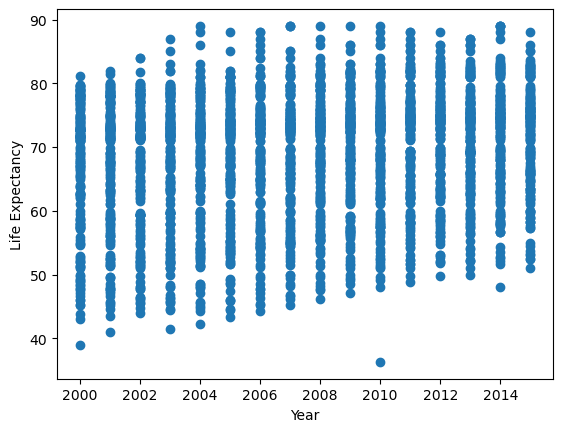

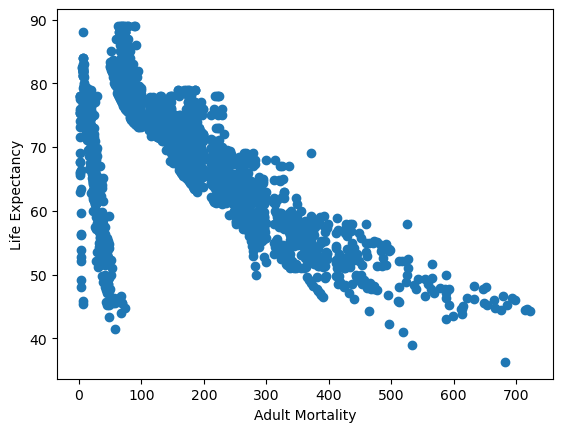

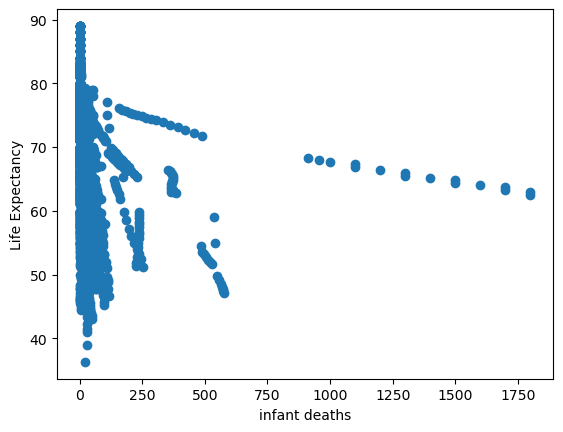

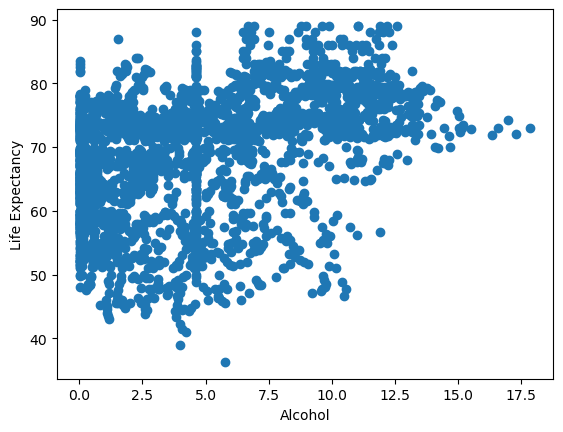

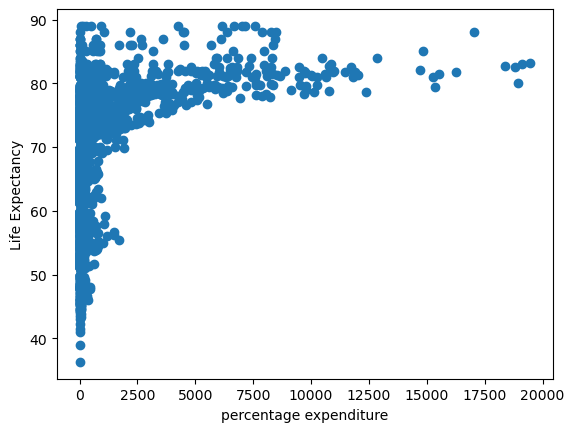

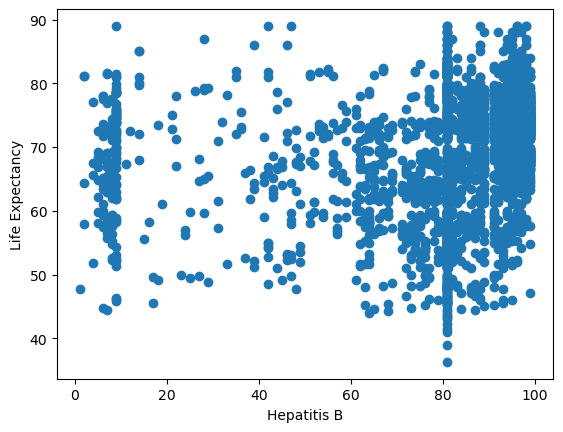

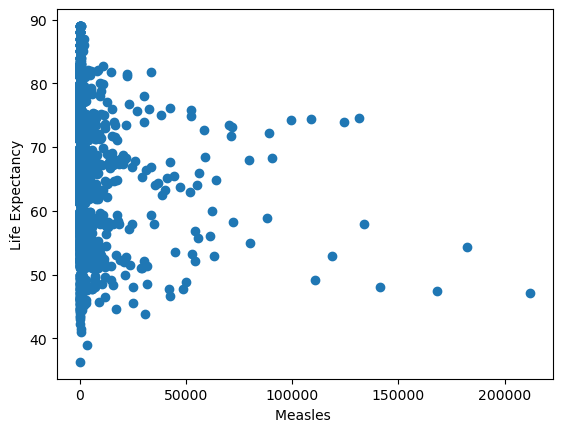

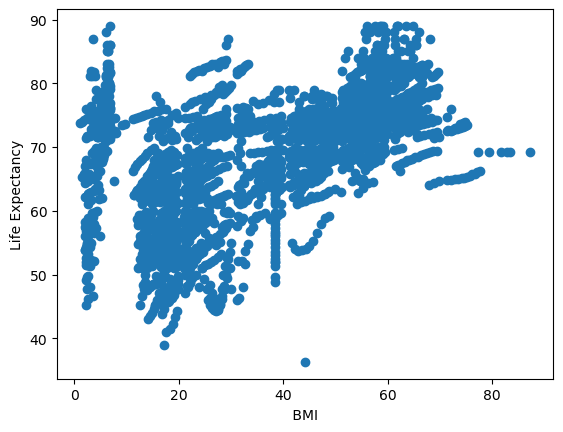

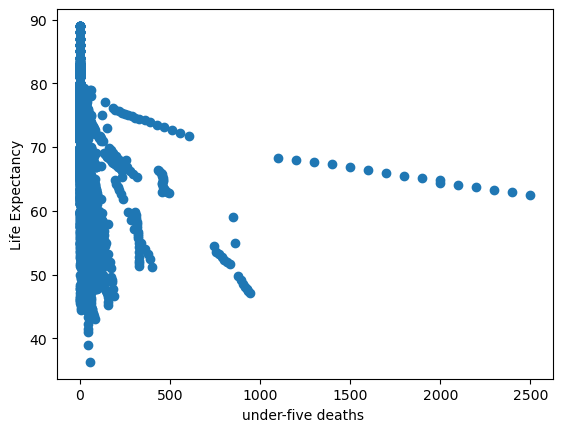

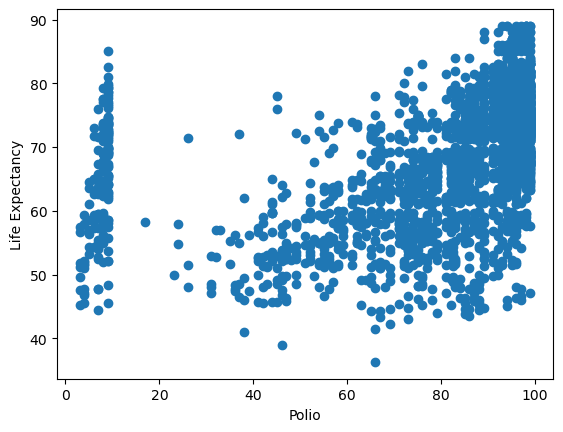

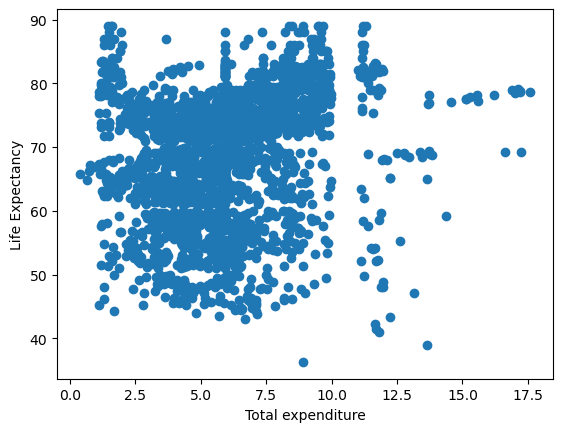

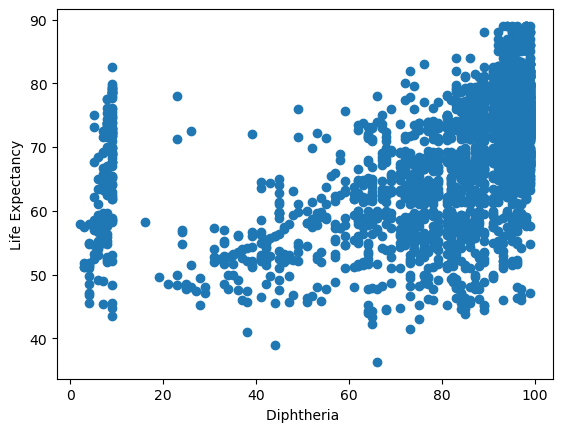

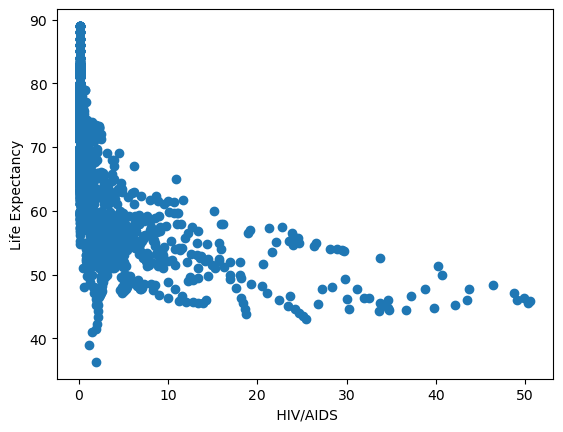

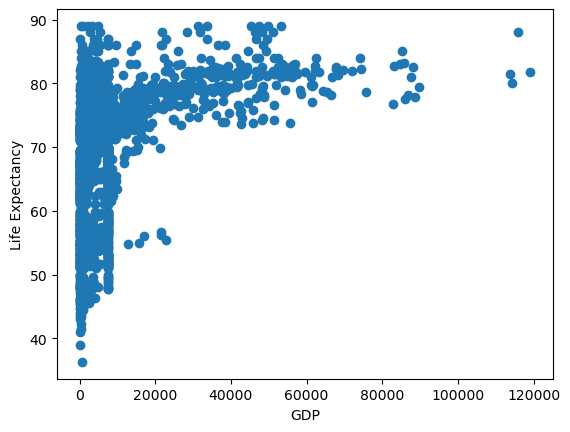

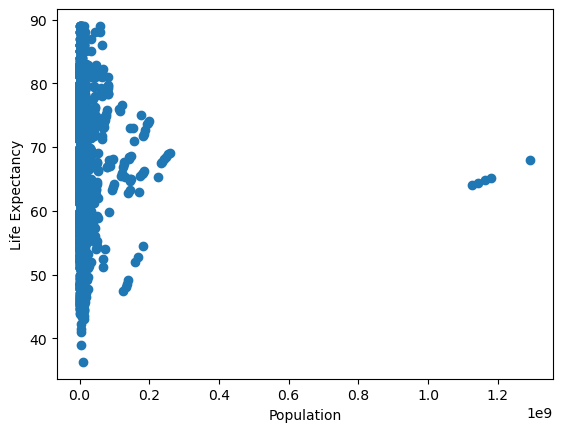

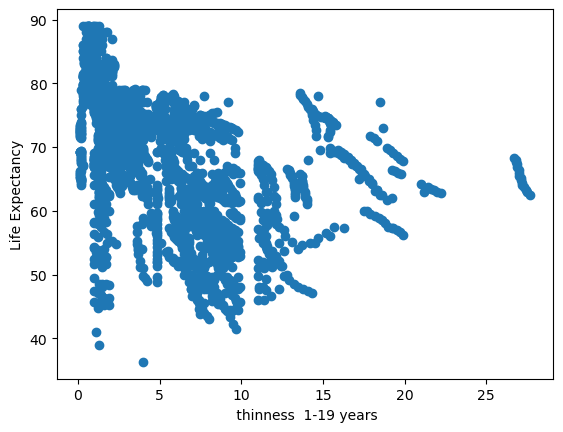

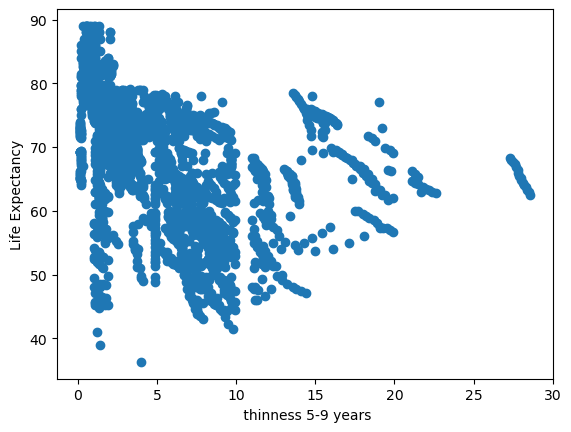

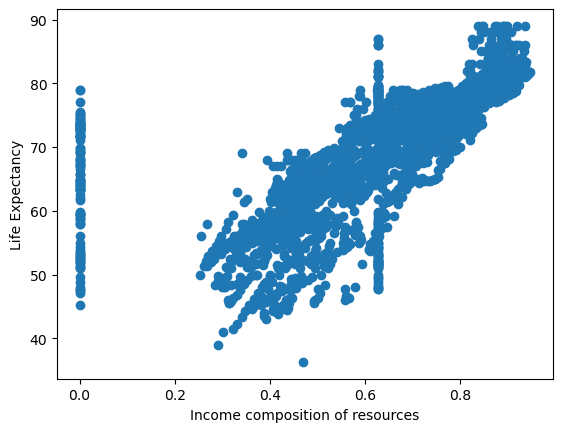

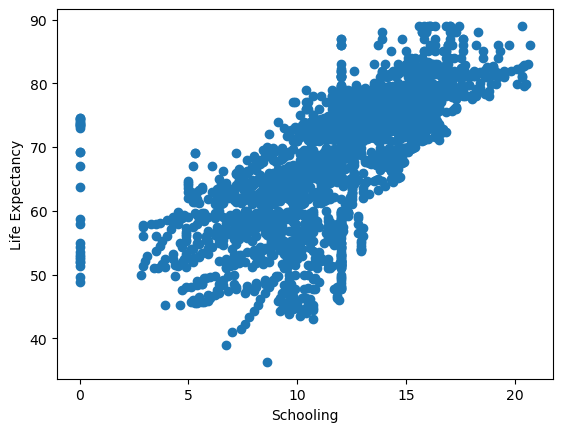

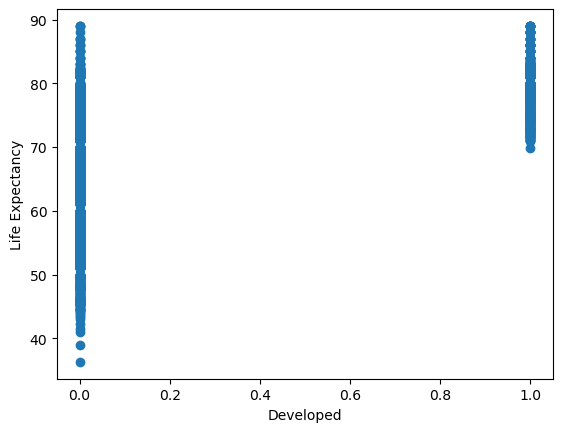

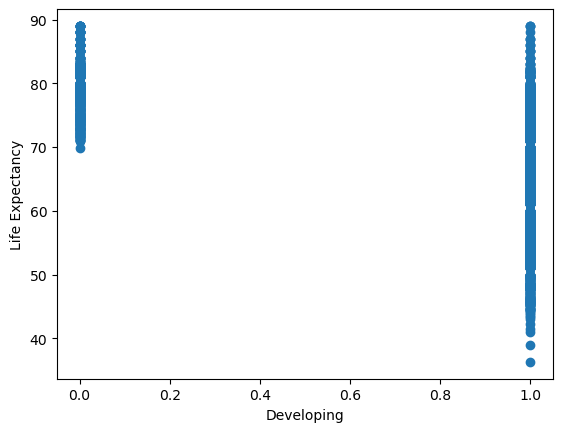

In [93]:
for feature in X_1.columns:
    plt.scatter(X_1[feature], y_1)
    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
    plt.show()

### TRAIN TEST SPLIT

In [88]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2350
588
2350
588


In [89]:
# Importing all of the learning algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [90]:
# Fitting all of the learning algorithms 
# ...
# Initializing the models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 50, max_depth = 30, random_state = 42)
xgb = XGBRegressor()
ada = AdaBoostRegressor()
svr = SVR()

# Fitting the mode
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
ada.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

In [91]:
# Prediction 
# Predicting on the test set
y_pred_lr = lr.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
ada_pred = ada.predict(X_test)
svr_pred = svr.predict(X_test)

In [92]:
# Computing the R2 scores
lr_r2 = r2_score(y_test, y_pred_lr)
knn_r2 = r2_score(y_test, knn_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
ada_r2 = r2_score(y_test, ada_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("KNN R2 score:", knn_r2)
print("Decision tree R2 score:", dt_r2)
print("Random forest R2 score:", rf_r2)
print("XGBoost R2 score:", xgb_r2)
print("AdaBoost R2 score:", ada_r2)
print("SVR R2 score:", svr_r2)
print("Linear Regression R2 score", lr_r2)

KNN R2 score: 0.13349365395944857
Decision tree R2 score: 0.9275556659036147
Random forest R2 score: 0.9687654543115742
XGBoost R2 score: 0.9627681370320037
AdaBoost R2 score: 0.8985393117366387
SVR R2 score: -0.11259796042933101
Linear Regression R2 score 0.8240562394249529
